In [1]:
import numpy as np
import pandas as pd

In [246]:
df = pd.read_csv("Downloads/world-data-2023.csv")

In [247]:
df.rename(columns = {"Density\n(P/Km2)" : "Density(P/Km2)"}, inplace=True)

In [248]:
df.head(6)

,Country,Density(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887
5,Antigua and Barbuda,223,AG,20.50%,443,0,15.33,1.0,"St. John's, Saint John",557,...,24.30%,2.76,"97,118",NaN,16.50%,43.00%,NaN,"23,800",17.060816,-61.796428


In [249]:
data_vis = df.copy()

In [250]:
# Dropping those columns that we do not require for Analysis
df.drop(columns =['Calling Code', 'Abbreviation', 'Currency-Code', 'Largest city', 'Official language', 'Physicians per thousand', 'Population: Labor force participation (%)', 'Gasoline Price', 'Fertility Rate', 'Forested Area (%)', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Out of pocket health expenditure', 'Capital/Major City'], inplace=True)

In [251]:
df.columns

Index(['Country', 'Density(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI',
       'CPI Change (%)', 'GDP', 'Infant mortality', 'Life expectancy',
       'Maternal mortality ratio', 'Minimum wage', 'Population',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   195 non-null    object 
 1   Density(P/Km2)            195 non-null    object 
 2   Agricultural Land( %)     188 non-null    object 
 3   Land Area(Km2)            194 non-null    object 
 4   Armed Forces size         171 non-null    object 
 5   Birth Rate                189 non-null    float64
 6   Co2-Emissions             188 non-null    object 
 7   CPI                       178 non-null    object 
 8   CPI Change (%)            179 non-null    object 
 9   GDP                       193 non-null    object 
 10  Infant mortality          189 non-null    float64
 11  Life expectancy           187 non-null    float64
 12  Maternal mortality ratio  181 non-null    float64
 13  Minimum wage              150 non-null    object 
 14  Population

In [253]:
df.head()

,Country,Density(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),GDP,...,Life expectancy,Maternal mortality ratio,Minimum wage,Population,Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,58.10%,"652,230","323,000",32.49,"8,672",149.9,2.30%,"$19,101,353,833",...,64.5,638.0,$0.43,"38,041,754",9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,43.10%,"28,748","9,000",11.78,"4,536",119.05,1.40%,"$15,278,077,447",...,78.5,15.0,$1.12,"2,854,191",18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,17.40%,"2,381,741","317,000",24.28,"150,006",151.36,2.00%,"$169,988,236,398",...,76.7,112.0,$0.95,"43,053,054",37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,40.00%,468,NaN,7.20,469,NaN,NaN,"$3,154,057,987",...,NaN,NaN,$6.63,"77,142",NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,47.50%,"1,246,700","117,000",40.73,"34,693",261.73,17.10%,"$94,635,415,870",...,60.8,241.0,$0.71,"31,825,295",9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [254]:
# Convert columns to numeric, removing commas and converting percentages
def convert_to_numeric(col):
    if col.dtype == 'object':
        col = col.str.replace(',', '').str.replace('%', '').str.replace('$', '')
    return pd.to_numeric(col, errors='coerce')

# Apply conversion to all columns that should be numeric
numeric_col = df.columns.drop(['Country'])
for col in numeric_col:
    df[col] = convert_to_numeric(df[col])

# Display missing data summary
missing_data_summary = df.isnull().mean().sort_values(ascending=False) * 100
print(missing_data_summary)

Minimum wage                23.076923
Tax revenue (%)             13.333333
Armed Forces size           12.307692
Unemployment rate            9.743590
CPI                          8.717949
CPI Change (%)               8.205128
Maternal mortality ratio     7.179487
Total tax rate               6.153846
Life expectancy              4.102564
Agricultural Land( %)        3.589744
Co2-Emissions                3.589744
Infant mortality             3.076923
Birth Rate                   3.076923
Urban_population             2.564103
GDP                          1.025641
Latitude                     0.512821
Longitude                    0.512821
Population                   0.512821
Land Area(Km2)               0.512821
Density(P/Km2)               0.000000
Country                      0.000000
dtype: float64


In [255]:
# Drop columns with 100% missing values
data_cleaned = df.drop(columns=df.columns[df.isnull().mean() == 1])

# Impute missing values for numeric columns with median
for col in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    data_cleaned[col].fillna(df[col].median(), inplace=True)

# Check if there are still any missing values
missing_values=data_cleaned.isnull().mean().sort_values(ascending=False) * 100
print(missing_values)

Country                     0.0
Life expectancy             0.0
Latitude                    0.0
Urban_population            0.0
Unemployment rate           0.0
Total tax rate              0.0
Tax revenue (%)             0.0
Population                  0.0
Minimum wage                0.0
Maternal mortality ratio    0.0
Infant mortality            0.0
Density(P/Km2)              0.0
GDP                         0.0
CPI Change (%)              0.0
CPI                         0.0
Co2-Emissions               0.0
Birth Rate                  0.0
Armed Forces size           0.0
Land Area(Km2)              0.0
Agricultural Land( %)       0.0
Longitude                   0.0
dtype: float64


In [256]:
data_cleaned

,Country,Density(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),GDP,...,Life expectancy,Maternal mortality ratio,Minimum wage,Population,Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,58.1,652230.0,323000.0,32.49,8672.0,149.90,2.3,1.910135e+10,...,64.5,638.0,0.430,38041754.0,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,43.1,28748.0,9000.0,11.78,4536.0,119.05,1.4,1.527808e+10,...,78.5,15.0,1.120,2854191.0,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,17.4,2381741.0,317000.0,24.28,150006.0,151.36,2.0,1.699882e+11,...,76.7,112.0,0.950,43053054.0,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,40.0,468.0,31000.0,7.20,469.0,125.34,2.3,3.154058e+09,...,73.2,53.0,6.630,77142.0,16.3,37.2,5.36,67873.0,42.506285,1.521801
4,Angola,26,47.5,1246700.0,117000.0,40.73,34693.0,261.73,17.1,9.463542e+10,...,60.8,241.0,0.710,31825295.0,9.2,49.1,6.89,21061025.0,-11.202692,17.873887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,24.5,912050.0,343000.0,17.88,164175.0,2740.27,254.9,4.823593e+11,...,72.1,125.0,0.010,28515829.0,16.3,73.3,8.80,25162368.0,6.423750,-66.589730
191,Vietnam,314,39.3,331210.0,522000.0,16.75,192668.0,163.52,2.8,2.619212e+11,...,75.3,43.0,0.730,96462106.0,19.1,37.6,2.01,35332140.0,14.058324,108.277199
192,Yemen,56,44.6,527968.0,40000.0,30.45,10609.0,157.58,8.1,2.691440e+10,...,66.1,164.0,1.045,29161922.0,16.3,26.6,12.91,10869523.0,15.552727,48.516388
193,Zambia,25,32.1,752618.0,16000.0,36.19,5141.0,212.31,9.2,2.306472e+10,...,63.5,213.0,0.240,17861030.0,16.2,15.6,11.43,7871713.0,-13.133897,27.849332


In [257]:
data_cleaned.describe()

,Density(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),GDP,Infant mortality,Life expectancy,Maternal mortality ratio,Minimum wage,Population,Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
count,195.000000,195.000000,1.950000e+02,1.950000e+02,195.000000,1.950000e+02,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000,195.000000,1.950000e+02,195.000000,195.000000
mean,356.764103,39.134872,6.867007e+05,1.434872e+05,20.145282,1.718583e+05,184.783744,6.359487,4.727532e+11,21.107179,72.317436,152.682051,1.928949,3.922447e+07,16.537436,40.599487,6.737641,2.185258e+07,19.083026,20.236230
std,1982.888967,21.386637,1.917085e+06,3.588039e+05,9.798615,8.240967e+05,380.557800,23.452045,2.161411e+12,19.285229,7.330019,226.629794,2.648408,1.447345e+08,6.479029,19.930828,4.845382,7.450449e+07,23.900297,66.543960
min,2.000000,0.600000,0.000000e+00,0.000000e+00,5.900000,1.100000e+01,99.030000,-4.300000,4.727146e+07,1.400000,52.800000,2.000000,0.010000,8.360000e+02,0.000000,8.000000,0.090000,5.464000e+03,-40.900557,-175.198242
25%,35.500000,22.650000,2.445650e+04,1.250000e+04,11.450000,2.625500e+03,114.470000,1.050000,8.476801e+09,6.100000,67.450000,16.500000,0.530000,2.004434e+06,12.550000,30.900000,3.590000,1.218046e+06,4.553072,-7.658537
50%,89.000000,39.600000,1.195110e+05,3.100000e+04,17.950000,1.230300e+04,125.340000,2.300000,3.438723e+10,14.000000,73.200000,53.000000,1.045000,8.826588e+06,16.300000,37.200000,5.360000,4.678104e+06,17.273849,20.972652
75%,216.500000,54.850000,5.205440e+05,1.230000e+05,28.445000,6.194100e+04,155.605000,3.750000,2.304710e+11,31.550000,77.250000,175.000000,1.625000,2.856227e+07,20.300000,47.300000,8.840000,1.460139e+07,40.106102,48.046657
max,26337.000000,82.600000,1.709824e+07,3.031000e+06,46.080000,9.893038e+06,4583.710000,254.900000,2.142770e+13,84.500000,85.400000,1150.000000,13.590000,1.397715e+09,37.200000,219.600000,28.180000,8.429340e+08,64.963051,178.065032


In [258]:
data_cleaned.columns

Index(['Country', 'Density(P/Km2)', 'Agricultural Land( %)', 'Land Area(Km2)',
       'Armed Forces size', 'Birth Rate', 'Co2-Emissions', 'CPI',
       'CPI Change (%)', 'GDP', 'Infant mortality', 'Life expectancy',
       'Maternal mortality ratio', 'Minimum wage', 'Population',
       'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',
       'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

# Exploratory Data Analysis

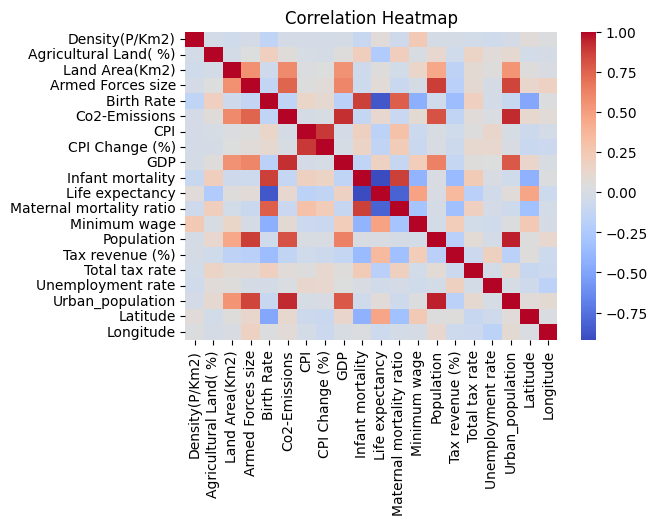

In [259]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data_cleaned.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Analyse Population Density and Land Area

C:\Users\labhe\AppData\Local\Temp\ipykernel_13316\617447645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Land Area(Km2)'] = temp['Land Area(Km2)'].apply(lambda x : np.log(x))


<Axes: xlabel='Density(P/Km2)', ylabel='Land Area(Km2)'>

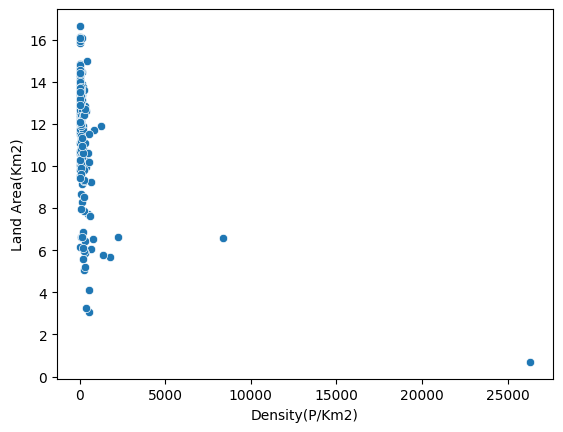

In [260]:
temp = data_cleaned[['Density(P/Km2)', 'Land Area(Km2)']]
temp['Land Area(Km2)'] = temp['Land Area(Km2)'].apply(lambda x : np.log(x))
sns.scatterplot(data = temp, x = 'Density(P/Km2)', y = 'Land Area(Km2)')

In [261]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 1.5

# Identify outliers
outliers = (temp < (Q1 - threshold * IQR)) | (temp > (Q3 + threshold * IQR))

# Filter out outliers
filtered_temp = temp[~(outliers.any(axis=1))]
filtered_temp.head()

,Density(P/Km2),Land Area(Km2)
0,60,13.388153
1,105,10.266323
2,18,14.683342
3,164,6.148468
4,26,14.036011


<Axes: xlabel='Density(P/Km2)', ylabel='Land Area(Km2)'>

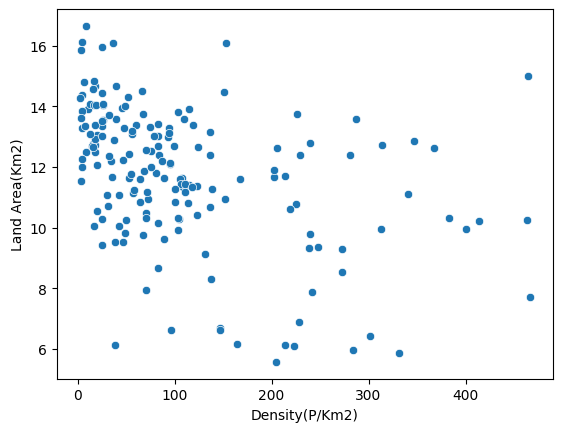

In [262]:
sns.scatterplot(data = filtered_temp, x = 'Density(P/Km2)', y = 'Land Area(Km2)')

Examine carbon dioxide emissions and their impact on climate change.

In [263]:
temp = data_cleaned[['Co2-Emissions', 'Life expectancy', 'Urban_population', 'Agricultural Land( %)']]
temp['Co2-Emissions'] = temp['Co2-Emissions'].apply(lambda x : np.log(x))
temp['Urban_population'] = temp['Urban_population'].apply(lambda x : np.log(x))
temp

C:\Users\labhe\AppData\Local\Temp\ipykernel_13316\2713680185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Co2-Emissions'] = temp['Co2-Emissions'].apply(lambda x : np.log(x))
C:\Users\labhe\AppData\Local\Temp\ipykernel_13316\2713680185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Urban_population'] = temp['Urban_population'].apply(lambda x : np.log(x))


,Co2-Emissions,Life expectancy,Urban_population,Agricultural Land( %)
0,9.067855,64.5,16.097615,58.1
1,8.419801,78.5,14.373750,43.1
2,11.918431,76.7,17.265819,17.4
3,6.150603,73.2,11.125394,40.0
4,10.454293,60.8,16.862935,47.5
...,...,...,...,...
190,12.008688,72.1,17.040860,24.5
191,12.168724,75.3,17.380304,39.3
192,9.269458,66.1,16.201473,44.6
193,8.545003,63.5,15.878786,32.1


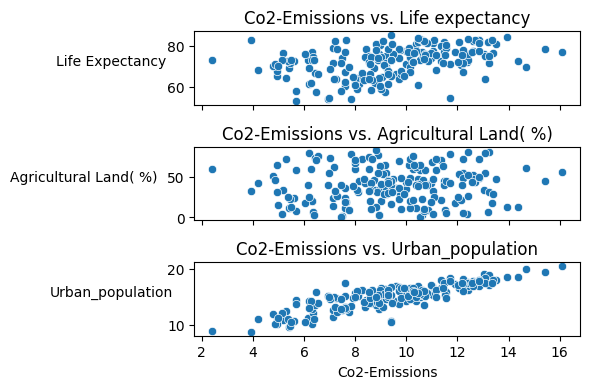

In [264]:
fig, axes = plt.subplots(3, 1, figsize=(6, 4), sharex=True)

sns.scatterplot(data = temp, x='Co2-Emissions', y='Life expectancy', ax=axes[0])
axes[0].set_title('Co2-Emissions vs. Life expectancy')
axes[0].set_xlabel('')
axes[0].set_ylabel('Life Expectancy', rotation=0, labelpad=40)


sns.scatterplot(data = temp, x='Co2-Emissions', y='Agricultural Land( %)', ax=axes[1])
axes[1].set_title('Co2-Emissions vs. Agricultural Land( %)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Agricultural Land( %)', rotation=0, labelpad=60)

sns.scatterplot(data = temp, x='Co2-Emissions', y='Urban_population', ax=axes[2])
axes[2].set_title('Co2-Emissions vs. Urban_population')
axes[2].set_xlabel('Co2-Emissions')
axes[2].set_ylabel('Urban_population', rotation=0, labelpad=40)

plt.tight_layout()
plt.show()

Explore correlations between economic indicators such as GDP and various socio-economic factors.

In [265]:
temp = data_cleaned[['Country', 'GDP', 'CPI', 'CPI Change (%)', 'Minimum wage', 'Tax revenue (%)', 'Total tax rate', 'Unemployment rate',]]
temp['GDP'] = temp['GDP'].apply(lambda x : np.log(x))
temp.head()

C:\Users\labhe\AppData\Local\Temp\ipykernel_13316\2287075060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['GDP'] = temp['GDP'].apply(lambda x : np.log(x))


,Country,GDP,CPI,CPI Change (%),Minimum wage,Tax revenue (%),Total tax rate,Unemployment rate
0,Afghanistan,23.673025,149.90,2.3,0.43,9.3,71.4,11.12
1,Albania,23.449685,119.05,1.4,1.12,18.6,36.6,12.33
2,Algeria,25.858995,151.36,2.0,0.95,37.2,66.1,11.70
3,Andorra,21.871956,125.34,2.3,6.63,16.3,37.2,5.36
4,Angola,25.273298,261.73,17.1,0.71,9.2,49.1,6.89


<Axes: xlabel='GDP', ylabel='Density'>

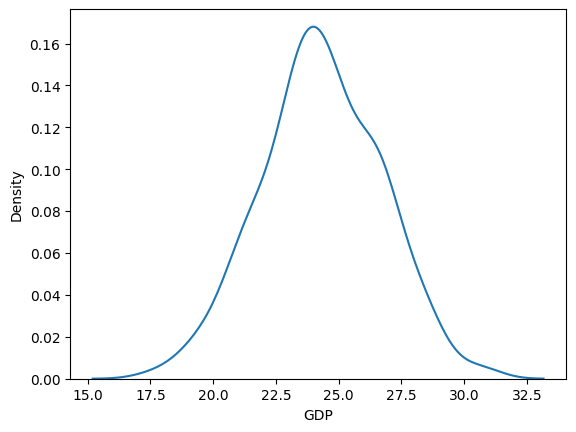

In [266]:
sns.kdeplot(data = temp, x ='GDP')

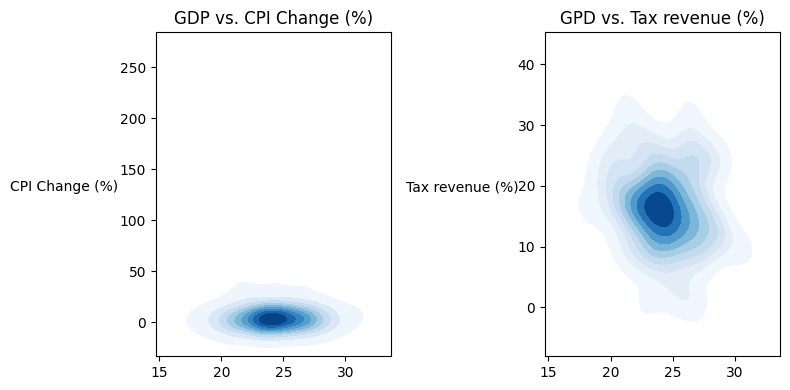

In [267]:
fig, axes = plt.subplots(1, 2, figsize=(8 ,4), sharex=True)

sns.kdeplot(data = temp, x ='GDP', y = 'CPI Change (%)', cmap='Blues', fill=True,ax= axes[0])
axes[0].set_title('GDP vs. CPI Change (%)')
axes[0].set_xlabel('')
axes[0].set_ylabel('CPI Change (%)', rotation=0, labelpad=40)


sns.kdeplot(data = temp, x ='GDP', y='Tax revenue (%)', cmap='Blues', fill=True, ax= axes[1])
axes[1].set_title('GPD vs. Tax revenue (%)')
axes[1].set_xlabel('')
axes[1].set_ylabel('Tax revenue (%)', rotation=0, labelpad=40)

plt.tight_layout()
plt.show()

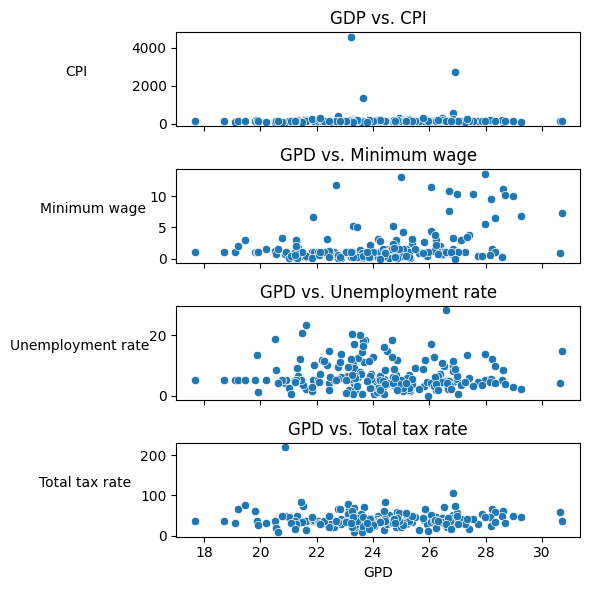

In [268]:
fig, axes = plt.subplots(4,1, figsize=(6, 6), sharex=True)

sns.scatterplot(data = temp, x='GDP', y='CPI', ax=axes[0])
axes[0].set_title('GDP vs. CPI')
axes[0].set_xlabel('')
axes[0].set_ylabel('CPI', rotation=0, labelpad=40)


sns.scatterplot(data = temp, x='GDP', y='Minimum wage', ax=axes[1])
axes[1].set_title('GPD vs. Minimum wage')
axes[1].set_xlabel('')
axes[1].set_ylabel('Minimum wage', rotation=0, labelpad=40)

sns.scatterplot(data = temp, x='GDP', y='Unemployment rate', ax=axes[2])
axes[2].set_title('GPD vs. Unemployment rate')
axes[2].set_xlabel('GPD')
axes[2].set_ylabel('Unemployment rate', rotation=0, labelpad=50)

sns.scatterplot(data = temp, x='GDP', y='Total tax rate', ax=axes[3])
axes[3].set_title('GPD vs. Total tax rate')
axes[3].set_xlabel('GPD')
axes[3].set_ylabel('Total tax rate', rotation=0, labelpad=40)

plt.tight_layout()
plt.show()

Investigate educational enrollment rates and their implications for human capital development.

In [269]:
temp = data_cleaned[['Country', 'Infant mortality', 'Life expectancy']]
temp.head()

,Country,Infant mortality,Life expectancy
0,Afghanistan,47.9,64.5
1,Albania,7.8,78.5
2,Algeria,20.1,76.7
3,Andorra,2.7,73.2
4,Angola,51.6,60.8


C:\Users\labhe\AppData\Local\Temp\ipykernel_13316\1585059508.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=temp, x='Infant mortality', y='Life expectancy', palette='viridis', s=100)


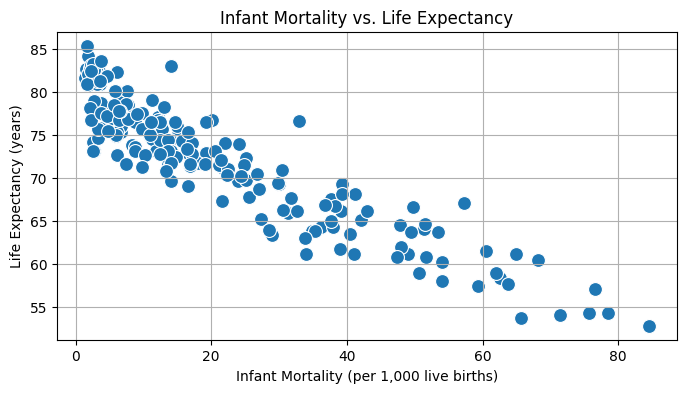

In [270]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=temp, x='Infant mortality', y='Life expectancy', palette='viridis', s=100)
plt.title('Infant Mortality vs. Life Expectancy')
plt.xlabel('Infant Mortality (per 1,000 live births)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

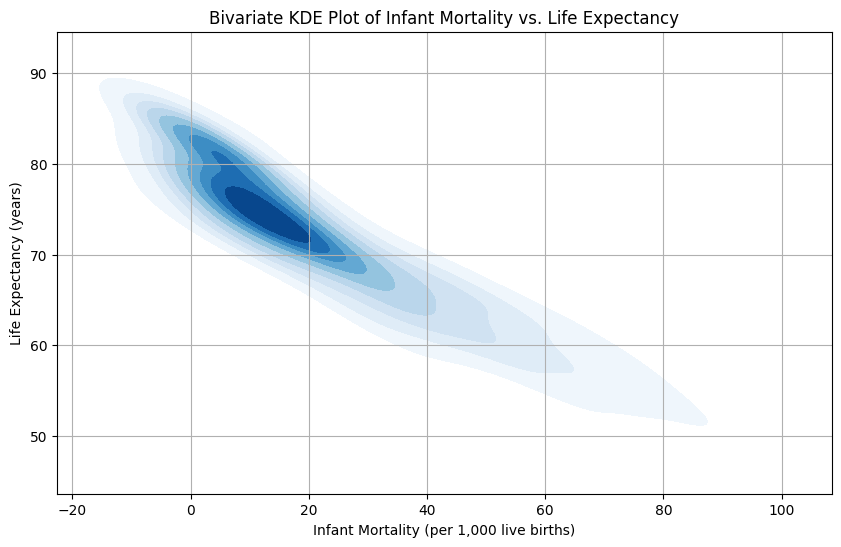

In [271]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=temp, x='Infant mortality', y='Life expectancy', cmap='Blues', fill=True)
plt.title('Bivariate KDE Plot of Infant Mortality vs. Life Expectancy')
plt.xlabel('Infant Mortality (per 1,000 live births)')
plt.ylabel('Life Expectancy (years)')
plt.grid(True)
plt.show()

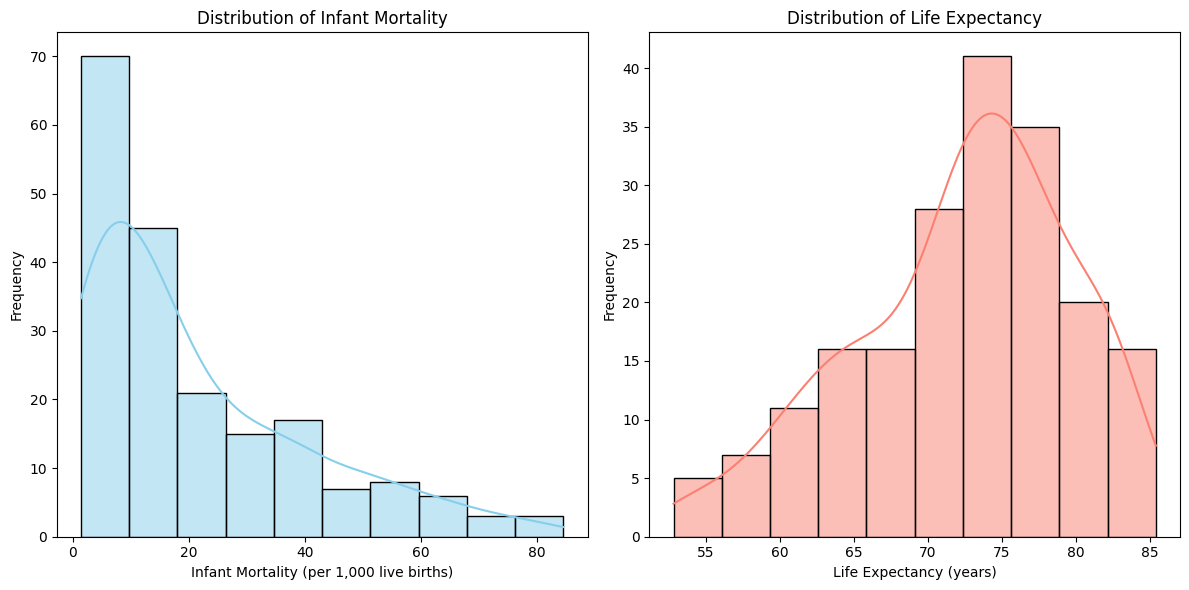

In [272]:
plt.figure(figsize=(12, 6))

# Histogram for Infant Mortality
plt.subplot(1, 2, 1)
sns.histplot(temp['Infant mortality'], kde=True, color='skyblue')
plt.title('Distribution of Infant Mortality')
plt.xlabel('Infant Mortality (per 1,000 live births)')
plt.ylabel('Frequency')

# Histogram for Life Expectancy
plt.subplot(1, 2, 2)
sns.histplot(temp['Life expectancy'], kde=True, color='salmon')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [273]:
from sklearn.preprocessing import MinMaxScaler
data_scaled = data_cleaned.copy()
# Selecting only numeric columns for scaling
numeric_cols = data_scaled.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

# Scale the numeric columns
data_scaled[numeric_cols] = scaler.fit_transform(data_cleaned[numeric_cols])

# Display the first few rows of scaled data to verify
data_scaled.head()

,Country,Density(P/Km2),Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Co2-Emissions,CPI,CPI Change (%),GDP,...,Life expectancy,Maternal mortality ratio,Minimum wage,Population,Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,0.002202,0.701220,0.038146,0.106565,0.661772,0.000875,0.011343,0.025463,0.000889,...,0.358896,0.554007,0.030928,0.027217,0.250000,0.299622,0.392666,0.011616,0.706944,0.687612
1,Albania,0.003911,0.518293,0.001681,0.002969,0.146341,0.000457,0.004464,0.021991,0.000711,...,0.788344,0.011324,0.081738,0.002041,0.500000,0.135161,0.435742,0.002067,0.775091,0.553034
2,Algeria,0.000608,0.204878,0.139297,0.104586,0.457442,0.015162,0.011669,0.024306,0.007931,...,0.733129,0.095819,0.069219,0.030802,1.000000,0.274575,0.413314,0.037375,0.651163,0.500640
3,Andorra,0.006152,0.480488,0.000027,0.010228,0.032354,0.000046,0.005867,0.025463,0.000145,...,0.625767,0.044425,0.487482,0.000055,0.438172,0.137996,0.187611,0.000074,0.787871,0.500250
4,Angola,0.000911,0.571951,0.072914,0.038601,0.866849,0.003506,0.036279,0.082562,0.004414,...,0.245399,0.208188,0.051546,0.022769,0.247312,0.194234,0.242079,0.024979,0.280529,0.546539


In [274]:
from sklearn.decomposition import PCA

pca = PCA()

# Applying PCA to the scaled numeric data
pca.fit(data_scaled[numeric_cols])

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a DataFrame to display the variance explained by each principal component
pca_results = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance': cumulative_variance
})

print(pca_results)

    Principal Component  Explained Variance Ratio  Cumulative Variance
0                     1                  0.389555             0.389555
1                     2                  0.123869             0.513425
2                     3                  0.095311             0.608735
3                     4                  0.072557             0.681292
4                     5                  0.067178             0.748470
5                     6                  0.056985             0.805456
6                     7                  0.049861             0.855317
7                     8                  0.034200             0.889518
8                     9                  0.026608             0.916126
9                    10                  0.017510             0.933636
10                   11                  0.014772             0.948408
11                   12                  0.012838             0.961246
12                   13                  0.011293             0.972539
13    

In [275]:
# Loadings of the principal components
loadings = pd.DataFrame(pca.components_, columns=numeric_cols).T

# Display loadings for the first 10 principal components
loadings_first_10 = loadings.iloc[:, :10]
print(loadings_first_10)

                                 0         1         2         3         4   
Density(P/Km2)           -0.020439  0.004395  0.001704 -0.032464  0.021405  \
Agricultural Land( %)     0.160671  0.918930 -0.256318 -0.042623  0.145021   
Land Area(Km2)           -0.019210  0.068175  0.260837  0.234523 -0.068103   
Armed Forces size        -0.025586  0.125517  0.385310  0.245468 -0.018498   
Birth Rate                0.493314 -0.064940  0.009967 -0.053207  0.013148   
Co2-Emissions            -0.025706  0.101560  0.250229  0.203934 -0.031983   
CPI                       0.036953 -0.015141  0.006826  0.033915 -0.082772   
CPI Change (%)            0.032911 -0.016357  0.006476  0.057385 -0.094711   
GDP                      -0.041262  0.119415  0.256187  0.227779 -0.062002   
Infant mortality          0.478239 -0.027150  0.065773 -0.072755 -0.104052   
Life expectancy          -0.464853  0.010658 -0.033932  0.035963  0.031090   
Maternal mortality ratio  0.369584  0.006498  0.052106 -0.121642

Loading Insights are:
a. PC1 is highly influenced by variables like Birth rate, Infant mortality, Maternal mortality ratio
b. PC2 is highly influenced by Agricultural land, and has few variance on other factors like unemplyment and population
c. PC3 is focused on Industrial factors like, Armed forces, Co2 emission, GDP, population
d. PC4 is influenced by Unployment and urban population and land area, which signifies that it focuses on country's employment rate.

Other PCs are influencing on mixed variable

C:\Users\labhe\AppData\Local\Temp\ipykernel_13316\141686760.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Principal Component', y='Explained Variance Ratio', data=pca_results, ax=ax[0], palette='viridis')


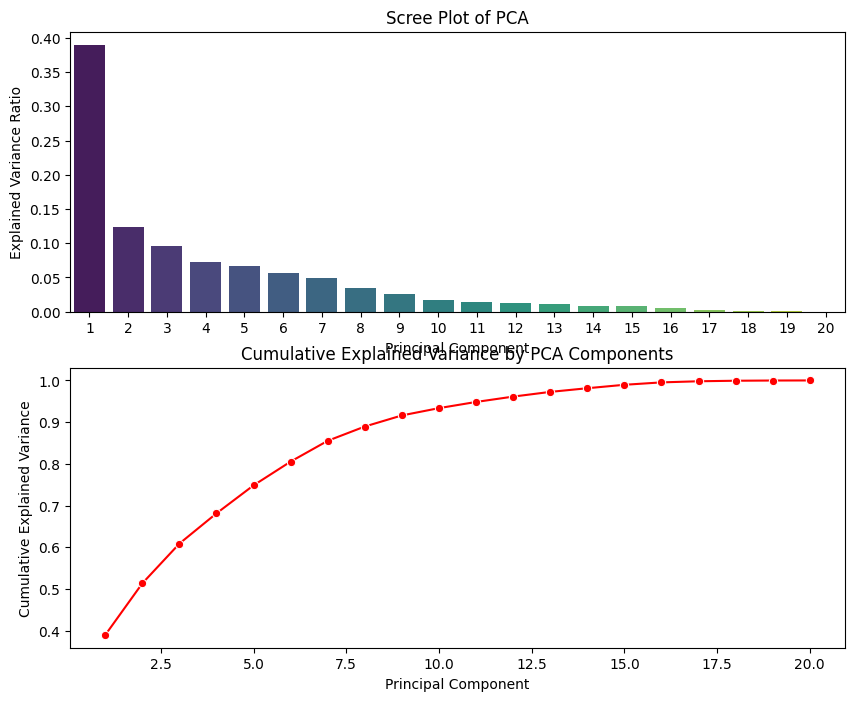

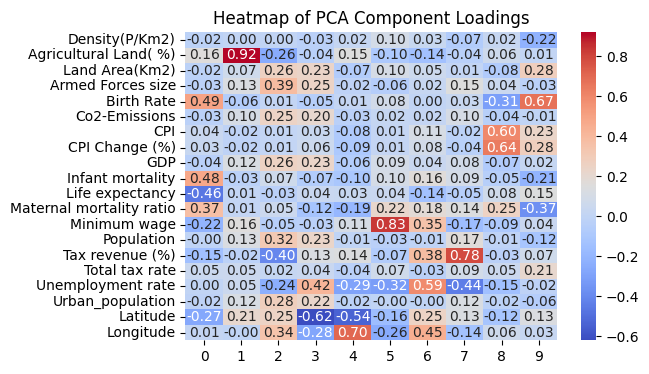

In [276]:
# Setting up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Scree plot
sns.barplot(x='Principal Component', y='Explained Variance Ratio', data=pca_results, ax=ax[0], palette='viridis')
ax[0].set_title('Scree Plot of PCA')
ax[0].set_ylabel('Explained Variance Ratio')

# Cumulative variance plot
sns.lineplot(x='Principal Component', y='Cumulative Variance', data=pca_results, marker='o', ax=ax[1], color='red')
ax[1].set_title('Cumulative Explained Variance by PCA Components')
ax[1].set_ylabel('Cumulative Explained Variance')

# plt.tight_layout()
# plt.show()

# Heatmap of the loadings for the first 10 principal components
plt.figure(figsize=(6, 4))
sns.heatmap(loadings_first_10, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of PCA Component Loadings')
plt.show()

Extracting Data for the visualisation part

In [277]:
data_vis.head()

,Country,Density(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [279]:
numeric_columns = data_vis.columns.drop(['Country', 'Abbreviation', 'Capital/Major City', 'Currency-Code', 'Official language', 'Largest city'])
for col in numeric_columns:
    data_vis[col] = convert_to_numeric(data_vis[col])

In [281]:
data_cleaned = data_vis.drop(columns=data_vis.columns[data_vis.isnull().mean() == 1])

# Impute missing values for numeric columns with median
for column in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    data_cleaned[column].fillna(data_cleaned[column].median(), inplace=True)

data_cleaned.head()

,Country,Density(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,...,78.4,0.28,38041754.0,48.90,9.3,71.4,11.12,9797273.0,33.939110,67.709953
1,Albania,105,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,...,56.9,1.20,2854191.0,55.70,18.6,36.6,12.33,1747593.0,41.153332,20.168331
2,Algeria,18,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,...,28.1,1.72,43053054.0,41.20,37.2,66.1,11.70,31510100.0,28.033886,1.659626
3,Andorra,164,AD,40.0,468.0,31000.0,7.20,376.0,Andorra la Vella,469.0,...,36.4,3.33,77142.0,62.45,16.3,37.2,5.36,67873.0,42.506285,1.521801
4,Angola,26,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,...,33.4,0.21,31825295.0,77.50,9.2,49.1,6.89,21061025.0,-11.202692,17.873887


In [284]:
data_cleaned.to_csv('Downloads/globalData2k23.csv')